<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/Predicting-income-of-employees/blob/main/machine_learning_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



# Importing the dataset

In [20]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Send a GET request to the URL
response = requests.get(url)

# Write the content of the response to a local file
with open("adult.data", "wb") as f:
    f.write(response.content)

# Load the dataset into a pandas DataFrame with specified column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv("adult.data",names=column_names)
df2 = df

# ***Checking the unique values***

In [4]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique

# ***Replacing the "?"s with mode***

In [21]:
# Replace "?" values with the mode of each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].replace(" ?", mode_value, inplace=True)

# Now "?" values in all columns should be replaced with their respective modes


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


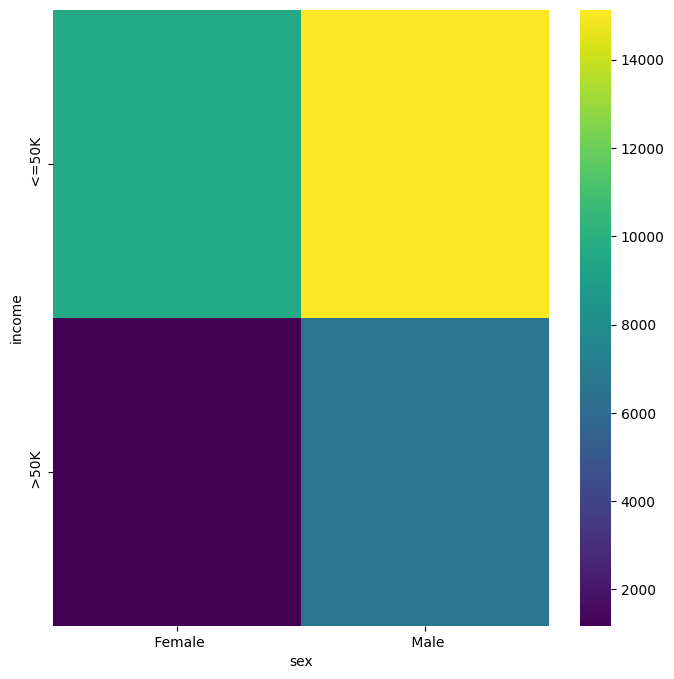

In [7]:
# @title sex vs income

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['income'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('income')

<ipython-input-9-8bc583eef501>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='marital-status', inner='box', palette='Dark2')


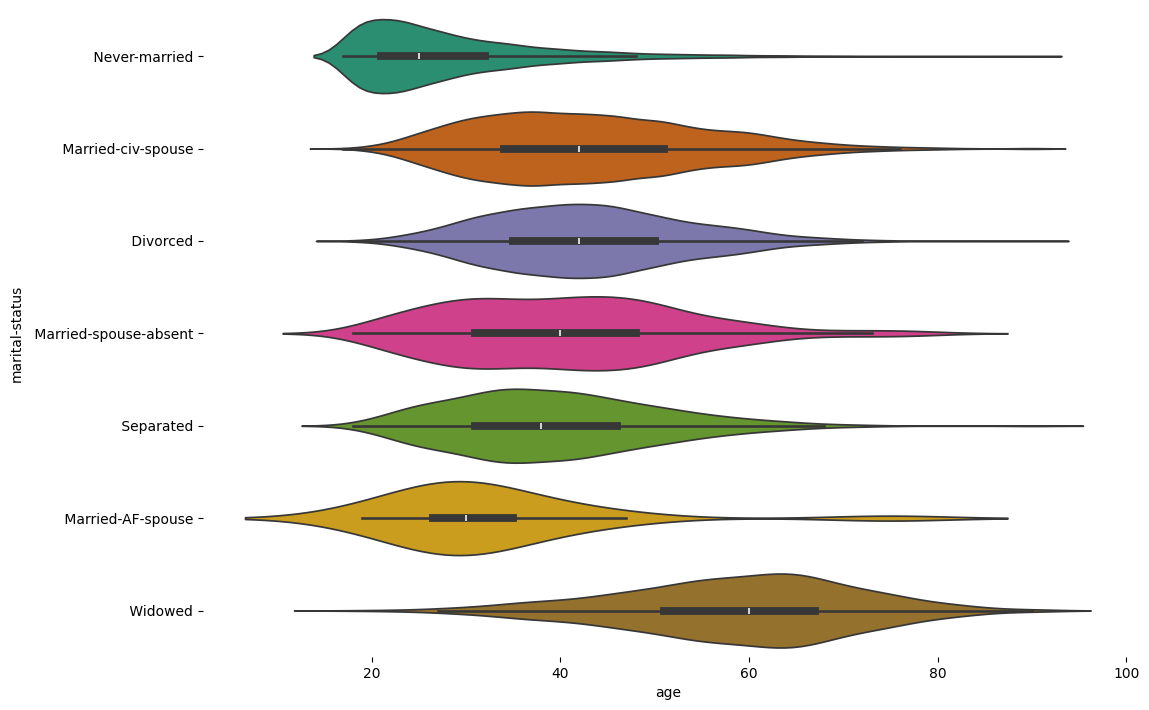

In [ ]:
# @title marital-status vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['marital-status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='marital-status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='age', ylabel='Count'>

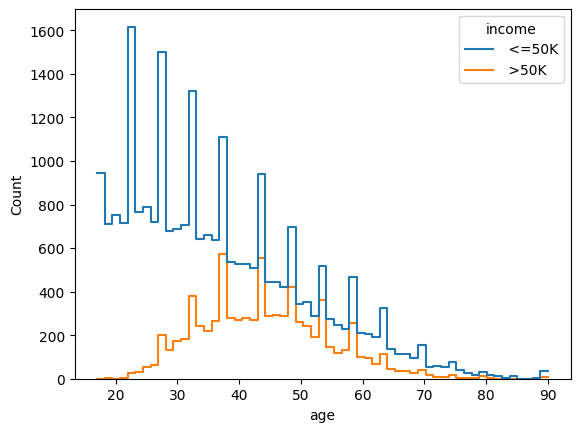

In [ ]:
# @title Distribution of age by income

sns.histplot(data=df, x="age", hue="income", element="step", fill=False)

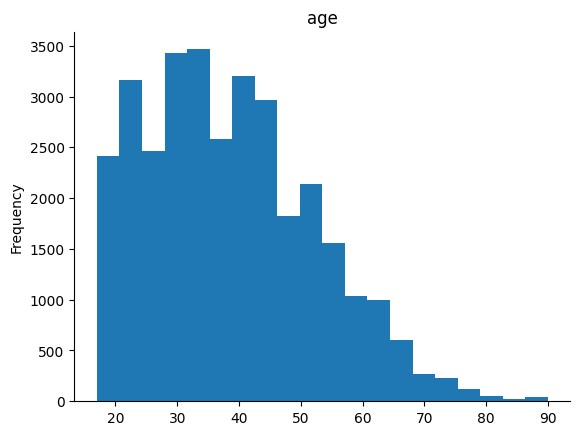

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique valu

# CHECKING WHETHER THERE ARE MISSING STUFF

In [9]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
workclass_mode = (df['workclass'].mode()).iloc[0]
occupation_mode = df['occupation'].mode().iloc[0]
nativecountry_mode = df['native-country'].mode().iloc[0]

In [ ]:
df['workclass'].fillna(value=workclass_mode, inplace=True)
df['occupation'].fillna(value=occupation_mode, inplace=True)
df['native-country'].fillna(value=nativecountry_mode, inplace=True)

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# Converting >= and <= 50k into true and false

In [24]:
# Replace values in the 'income' column with boolean values
df['income'] = df['income'].str.strip().replace({'<=50K': False, '>50K': True})

# Check the first few values in the 'income' column
print(df['income'].head())

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool


In [25]:
df.income.head()

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool

In [26]:
df2 = df.income
df2.head()

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool

# One hot encoding

In [29]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income              bool
dtype: object

In [30]:
to_encode = df.select_dtypes(include=['object']).columns
to_encode

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [31]:
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [32]:
##Workclass
top_10_WC = df['workclass'].value_counts()[:10].sort_values(ascending=False).index
top_10_WC

##education
top_10_E = df['education'].value_counts()[:10].sort_values(ascending=False).index
top_10_E

##occupation
top_10_O = df['occupation'].value_counts()[:10].sort_values(ascending=False).index
top_10_O

##native-country
top_10_NC = df['native-country'].value_counts()[:10].sort_values(ascending=False).index
top_10_NC

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England'],
      dtype='object')

In [33]:
##Workclass
for val in top_10_WC :
    df["Workclass"+"_"+ val] = np.where((df['workclass'] == val), 1, 0)

##education
for val in top_10_E :
    df["Education"+"_"+ val] = np.where((df['education'] == val), 1, 0)


##occupation
for val in top_10_O :
    df["Occupation"+"_"+ val] = np.where((df['occupation'] == val), 1, 0)


##native-country
for val in top_10_NC :
    df["NativeCountry"+"_"+ val] = np.where((df['native-country'] == val), 1, 0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,NativeCountry_ United-States,NativeCountry_ Mexico,NativeCountry_ Philippines,NativeCountry_ Germany,NativeCountry_ Canada,NativeCountry_ Puerto-Rico,NativeCountry_ El-Salvador,NativeCountry_ India,NativeCountry_ Cuba,NativeCountry_ England
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,0,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,1,0,0,0,0,0,0,0,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,1,0,0,0,0,0,0,0,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,1,0,0,0,0,0,0,0,0,0


In [34]:
to_drop = ['workclass', 'education', 'occupation', 'native-country']
df = df.drop(columns = to_drop, axis=1)
to_encode = to_encode.drop(to_drop)

In [35]:
for name in to_encode:
    temp_df = pd.get_dummies(df[name])
    df.join(temp_df)

In [36]:
df.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,NativeCountry_ United-States,NativeCountry_ Mexico,NativeCountry_ Philippines,NativeCountry_ Germany,NativeCountry_ Canada,NativeCountry_ Puerto-Rico,NativeCountry_ El-Salvador,NativeCountry_ India,NativeCountry_ Cuba,NativeCountry_ England
0,39,77516,13,Never-married,Not-in-family,White,Male,2174,0,40,...,1,0,0,0,0,0,0,0,0,0
1,50,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,...,1,0,0,0,0,0,0,0,0,0
2,38,215646,9,Divorced,Not-in-family,White,Male,0,0,40,...,1,0,0,0,0,0,0,0,0,0
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,40,...,1,0,0,0,0,0,0,0,0,0
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,40,...,0,0,0,0,0,0,0,0,1,0


In [37]:
df = df.drop(columns = to_encode, axis=1)

In [38]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Education_ HS-grad',
       'Education_ Some-college', 'Education_ Bachelors', 'Education_ Masters',
       'Education_ Assoc-voc', 'Education_ 11th', 'Education_ Assoc-acdm',
       'Education_ 10th', 'Education_ 7th-8th', 'Education_ Prof-school',
       'Occupation_ Prof-specialty', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Adm-clerical',
       'Occupation_ Sales', 'Occupation_ Other-service',
       'Occupation_ Machine-op-inspct', 'Occupation_ Transport-moving',
       'Occupation_ Handlers-cleaners', 'Occupation_ Farming-fishing',
       'NativeCountry_ United-States', 'NativeCountry_ Mexico',
       'Nat

In [39]:
df.dtypes

age                              int64
fnlwgt                           int64
education-num                    int64
capital-gain                     int64
capital-loss                     int64
hours-per-week                   int64
income                            bool
Workclass_ Private               int64
Workclass_ Self-emp-not-inc      int64
Workclass_ Local-gov             int64
Workclass_ State-gov             int64
Workclass_ Self-emp-inc          int64
Workclass_ Federal-gov           int64
Workclass_ Without-pay           int64
Workclass_ Never-worked          int64
Education_ HS-grad               int64
Education_ Some-college          int64
Education_ Bachelors             int64
Education_ Masters               int64
Education_ Assoc-voc             int64
Education_ 11th                  int64
Education_ Assoc-acdm            int64
Education_ 10th                  int64
Education_ 7th-8th               int64
Education_ Prof-school           int64
Occupation_ Prof-specialt

In [40]:
drop_col = ['fnlwgt', 'capital-gain', 'capital-loss']

In [41]:
df = df.drop(columns=drop_col, axis=1)

# Implementation of model

In [42]:
df2.dtypes

dtype('bool')

In [43]:
# Extracting the target variable (y)
y = df2

X = df.drop(columns=['income'], axis=1)  # Drop the 'income' column along the columns axis (axis=1)

# Now, y contains the target variable ('income') and X contains all other columns as features

In [44]:
X.head()

,age,education-num,hours-per-week,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ State-gov,Workclass_ Self-emp-inc,Workclass_ Federal-gov,Workclass_ Without-pay,...,NativeCountry_ United-States,NativeCountry_ Mexico,NativeCountry_ Philippines,NativeCountry_ Germany,NativeCountry_ Canada,NativeCountry_ Puerto-Rico,NativeCountry_ El-Salvador,NativeCountry_ India,NativeCountry_ Cuba,NativeCountry_ England
0,39,13,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38,9,40,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,53,7,40,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,28,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=7)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

Best 5 features:
Index(['age', 'education-num', 'hours-per-week', 'Education_ Bachelors',
       'Education_ Masters', 'Occupation_ Exec-managerial',
       'Occupation_ Other-service'],
      dtype='object')


In [46]:
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [48]:
grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
           }

In [49]:
from sklearn.model_selection import GridSearchCV

print('Running Grid Search...')
rf = RandomForestClassifier()


grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

print('Done')

Running Grid Search...
Done


In [50]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))
best_max_depth_rf = model_grid.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid.best_estimator_.n_estimators
best_estimators_rf

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 100}
Best score is: 0.8075201971786404


100

# ***Handling imbalanced data for RF***

In [51]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE technique
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)

In [52]:
model_grid = grid.fit(X_train1,y_train1)

In [53]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))
best_max_depth_rf = model_grid.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid.best_estimator_.n_estimators
best_estimators_rf

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 200}
Best score is: 0.7917822468793343


200

# ***Normalization and standardization***

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object for normalization
min_max_scaler = MinMaxScaler()

# Create a StandardScaler object for standardization
standard_scaler = StandardScaler()

# Assuming X is your feature matrix containing numerical features

# Normalization (MinMaxScaler)
X_normalized = min_max_scaler.fit_transform(X_train)

# Standardization (StandardScaler)
X_standardized = standard_scaler.fit_transform(X_train)

In [58]:
model_grid = grid.fit(X_normalized,y_train)

print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))
best_max_depth_rf = model_grid.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid.best_estimator_.n_estimators
best_estimators_rf


Best hyperparameters are: {'max_depth': 10, 'n_estimators': 200}
Best score is: 0.8072569007159361


200

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
# 1. Instantiate the machine learning models
naive_bayes_model = GaussianNB()


# 2. Train the machine learning models
naive_bayes_model.fit(X_train, y_train)

# 3. Predict on the testing set
naive_bayes_pred = naive_bayes_model.predict(X_test)

# 4. Evaluate the performance of the models
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

print("Naive Bayes Model Accuracy:", naive_bayes_accuracy)

# You can also print classification reports for more detailed evaluation
print("Naive Bayes Model Classification Report:")
print(classification_report(y_test, naive_bayes_pred))

Naive Bayes Model Accuracy: 0.4748694851059474
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.34      0.50      7469
        True       0.30      0.91      0.45      2300

    accuracy                           0.47      9769
   macro avg       0.61      0.63      0.47      9769
weighted avg       0.78      0.47      0.49      9769



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities and class labels
nb_predictions = list(nb_model.predict_proba(X_test)[:,1])
nb_class_label_predictions = nb_model.predict(X_test)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test, nb_class_label_predictions)

print('Naive Bayes Accuracy Score:', nb_acc_score)


Naive Bayes Accuracy Score: 0.4748694851059474


# Handling imbalanced data


In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE technique
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)
# Initialize and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train1, y_train1)

# Predict probabilities and class labels
nb_predictions = list(nb_model.predict_proba(X_test1)[:,1])
nb_class_label_predictions = nb_model.predict(X_test1)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test1, nb_class_label_predictions)

print('Naive Bayes Accuracy Score:', nb_acc_score)

Naive Bayes Accuracy Score: 0.6577669902912622


In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Instantiate Multinomial Naive Bayes
multinomial_nb = MultinomialNB()

# Instantiate Complement Naive Bayes
complement_nb = ComplementNB()

multinomial_nb.fit(X_train1, y_train1)

# Predict probabilities and class labels
nb_predictions = list(multinomial_nb.predict_proba(X_test1)[:,1])
nb_class_label_predictions = multinomial_nb.predict(X_test1)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test1, nb_class_label_predictions)

print('Naive Bayes multinomial_nb Accuracy Score:', nb_acc_score)


Naive Bayes multinomial_nb Accuracy Score: 0.7463592233009708


In [ ]:
complement_nb.fit(X_train1, y_train1)

# Predict probabilities and class labels
nb_predictions = list(complement_nb.predict_proba(X_test1)[:,1])
nb_class_label_predictions = complement_nb.predict(X_test1)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test1, nb_class_label_predictions)

print('Naive Bayes complement_nb Accuracy Score:', nb_acc_score)

Naive Bayes complement_nb Accuracy Score: 0.7467637540453075


## DOING hyperparameter tuning for Nb TYPES

In [ ]:
# Define the grid of parameters to search
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Instantiate the GridSearchCV object
grid = GridSearchCV(multinomial_nb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train1, y_train1)

# Get the best parameter
best_alpha = grid.best_params_['alpha']

# Get the best estimator
best_estimator = grid.best_estimator_

# Predict on the testing set using the best estimator
y_pred = best_estimator.predict(X_test1)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test1, y_pred)

print("Best alpha:", best_alpha)
print("Best model accuracy multinomial_nb:", accuracy)

Best alpha: 0.1
Best model accuracy multinomial_nb: 0.7462918015102481


In [ ]:
# Define the grid of parameters to search
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Instantiate the GridSearchCV object
grid = GridSearchCV(complement_nb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train1, y_train1)

# Get the best parameter
best_alpha = grid.best_params_['alpha']

# Get the best estimator
best_estimator = grid.best_estimator_

# Predict on the testing set using the best estimator
y_pred = best_estimator.predict(X_test1)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test1, y_pred)

print("Best alpha:", best_alpha)
print("Best model accuracy complement_nb:", accuracy)

Best alpha: 0.1
Best model accuracy complement_nb: 0.7466289104638619


In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Instantiate BaggingClassifier with Naive Bayes as the base estimator
bagging_nb = BaggingClassifier(base_estimator=multinomial_nb, n_estimators=10)

# Instantiate AdaBoostClassifier with Naive Bayes as the base estimator
adaboost_nb = AdaBoostClassifier(base_estimator=multinomial_nb, n_estimators=50)

# Instantiate Multinomial Naive Bayes
multinomial_nb = MultinomialNB()

# Instantiate Complement Naive Bayes
complement_nb = ComplementNB()

bagging_nb.fit(X_train1, y_train1)

# Predict probabilities and class labels
nb_predictions = list(bagging_nb.predict_proba(X_test1)[:,1])
nb_class_label_predictions = bagging_nb.predict(X_test1)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test1, nb_class_label_predictions)

print('Naive Bayes bagging_nb Accuracy Score:', nb_acc_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Naive Bayes bagging_nb Accuracy Score: 0.7460895361380798


In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Instantiate BaggingClassifier with Naive Bayes as the base estimator
bagging_nb = BaggingClassifier(base_estimator=multinomial_nb, n_estimators=10)

# Instantiate AdaBoostClassifier with Naive Bayes as the base estimator
adaboost_nb = AdaBoostClassifier(base_estimator=multinomial_nb, n_estimators=50)

# Instantiate Multinomial Naive Bayes
multinomial_nb = MultinomialNB()

# Instantiate Complement Naive Bayes
complement_nb = ComplementNB()

adaboost_nb.fit(X_train1, y_train1)

# Predict probabilities and class labels
nb_predictions = list(adaboost_nb.predict_proba(X_test1)[:,1])
nb_class_label_predictions = adaboost_nb.predict(X_test1)

# Calculate accuracy score
nb_acc_score = accuracy_score(y_test1, nb_class_label_predictions)

print('Naive Bayes adaboost_nb Accuracy Score:', nb_acc_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Naive Bayes adaboost_nb Accuracy Score: 0.49163969795037754
